# Applying `SPARK` to ST datasets segmented by different methods

In [1]:
set.seed(20240709)

library(SPARK)
library(ggplot2)

max_cores <- 36

In [2]:
DATA_PATH <- "/import/home/share/zw/pql/data/breast_cancer"
RESULT_PATH <- "/import/home/share/zw/pql/results/breast_cancer"

if (!dir.exists(RESULT_PATH)) {
    dir.create(RESULT_PATH, recursive = TRUE)
}

## Cells segmented by the `10x` method

In [3]:
seg_method <- "Cell_10X"

counts <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "rawdata", seg_method, "counts.csv")
))
rownames(counts) <- counts[, 1]
counts[, 1] <- NULL
# head(counts)

coordinates <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "rawdata", seg_method, "coordinates.csv")
))
rownames(coordinates) <- coordinates[, 1]
coordinates[, 1] <- NULL
# head(coordinates)

scvi_label <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "rawdata", seg_method, "scvi_label.csv")
))
rownames(scvi_label) <- scvi_label[, 1]
scvi_label <- scvi_label[, 2]
# head(scvi_label)
all_celltypes <- unique(scvi_label)

New names:
• `` -> `...1`
Rows: 10000 Columns: 308
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (308): ...1, SFRP1, PCLAF, CDC42EP1, LGALSL, CCL5, USP53, IGF1, ESM1, MN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 10000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ...1, x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 10000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): celltype
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_type

In [4]:
pvalues_10x <- data.frame()
for(celltype_k in all_celltypes) {
    celltype_idx <- which(scvi_label == celltype_k)

    counts_k <- counts[celltype_idx, ]
    coordinates_k <- coordinates[celltype_idx, ]

    spark_obj <- CreateSPARKObject(
        counts = t(counts_k), location = coordinates_k
    )
    spark_obj@lib_size <- apply(spark_obj@counts, 2, sum)

    spark_obj <- spark.vc(
        spark_obj,
        covariates = NULL, lib_size = spark_obj@lib_size,
        num_core = max_cores, verbose = FALSE
    )
    spark_obj <- spark.test(spark_obj, check_positive = TRUE, verbose = FALSE)

    pvalues_10x <- rbind(
        pvalues_10x,
        data.frame(
            celltype = celltype_k,
            gene = rownames(spark_obj@res_mtest),
            pvalue = spark_obj@res_mtest[, "combined_pvalue"]
        )
    )
}

saveRDS(pvalues_10x, file.path(RESULT_PATH, seg_method, "pvalues_SPARK.rds"))
# pvalues_10X <- readRDS(file.path(RESULT_PATH, seg_method, "pvalues_SPARK.rds"))

## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  1484 
## number of total features:  119 
## number of adjusted covariates:  0 
# fitting count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  783 
## number of total features:  123 
## number of adjusted covariates:  0 
# fitting count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing P

## Cells segmented by `UCS`

In [5]:
seg_method <- "UCS_10X"

counts <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "rawdata", seg_method, "counts.csv")
))
rownames(counts) <- counts[, 1]
counts[, 1] <- NULL
# head(counts)

coordinates <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "rawdata", seg_method, "coordinates.csv")
))
rownames(coordinates) <- coordinates[, 1]
coordinates[, 1] <- NULL
# head(coordinates)

scvi_label <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "rawdata", seg_method, "scvi_label.csv")
))
rownames(scvi_label) <- scvi_label[, 1]
scvi_label <- scvi_label[, 2]
# head(scvi_label)
all_celltypes <- unique(scvi_label)

New names:
• `` -> `...1`
Rows: 10000 Columns: 308
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (308): ...1, IL2RG, SNAI1, GLIPR1, OXTR, MYBPC1, MUC6, PDK4, KLRB1, RUNX...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 10000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ...1, x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 10000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): celltype
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_type

In [6]:
pvalues_UCS <- data.frame()
for(celltype_k in all_celltypes) {
    celltype_idx <- which(scvi_label == celltype_k)

    counts_k <- counts[celltype_idx, ]
    coordinates_k <- coordinates[celltype_idx, ]

    spark_obj <- CreateSPARKObject(
        counts = t(counts_k), location = coordinates_k
    )
    spark_obj@lib_size <- apply(spark_obj@counts, 2, sum)

    spark_obj <- spark.vc(
        spark_obj,
        covariates = NULL, lib_size = spark_obj@lib_size,
        num_core = max_cores, verbose = FALSE
    )
    spark_obj <- spark.test(spark_obj, check_positive = TRUE, verbose = FALSE)

    pvalues_UCS <- rbind(
        pvalues_UCS,
        data.frame(
            celltype = celltype_k,
            gene = rownames(spark_obj@res_mtest),
            pvalue = spark_obj@res_mtest[, "combined_pvalue"]
        )
    )
}

saveRDS(pvalues_UCS, file.path(RESULT_PATH, seg_method, "pvalues_SPARK.rds"))
# pvalues_UCS <- readRDS(file.path(RESULT_PATH, seg_method, "pvalues_SPARK.rds"))

## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  516 
## number of total features:  127 
## number of adjusted covariates:  0 
# fitting count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  1397 
## number of total features:  151 
## number of adjusted covariates:  0 
# fitting count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing P

## Comparsion of the cell-type-specific SVG identification results

In [7]:
# pvalues_10x <- readRDS(
#     file = file.path(
#         RESULT_PATH, "Cell_10X", "pvalues_SPARK.rds"
#     )
# )
# pvalues_UCS <- readRDS(
#     file = file.path(
#         RESULT_PATH, "UCS_10X", "pvalues_SPARK.rds"
#     )
# )

In [8]:
pvalues_all <- merge(
    pvalues_10x,
    pvalues_UCS,
    by = c("celltype", "gene"),
    suffixes = c("_10x", "_UCS")
)
dim(pvalues_all)
head(pvalues_all)

[1] 2293    4

,celltype,gene,pvalue_10x,pvalue_UCS
,<chr>,<chr>,<dbl>,<dbl>
1,B Cells,ACTA2,2.620683e-01,2.582501e-01
2,B Cells,ACTG2,1.825688e-04,2.336949e-02
3,B Cells,ADAM9,3.848503e-01,5.741089e-01
4,B Cells,ADGRE5,8.023561e-01,9.216916e-02
5,B Cells,ADH1B,3.258525e-05,2.975693e-05
6,B Cells,AIF1,6.021024e-01,3.361676e-01


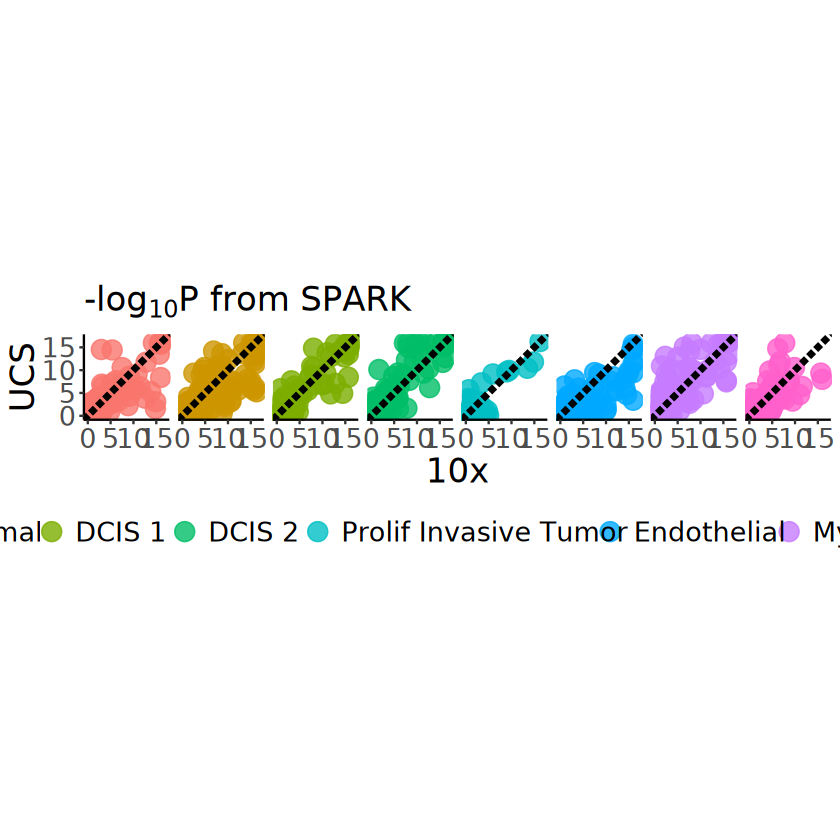

In [9]:
log10p_lim <- 17 # 5.55e-17

major_celltypes <- c("Invasive Tumor", "Stromal", "DCIS 1", "DCIS 2", "Prolif Invasive Tumor", "Endothelial", "Myoepi ACTA2+", "Myoepi KRT15+")
pvalues_all_major_celltype <- pvalues_all[pvalues_all$celltype %in% major_celltypes, ]
pvalues_all_major_celltype$celltype <- factor(
    pvalues_all_major_celltype$celltype,
    levels = major_celltypes
)

p <- ggplot(
    # pvalues_all,
    pvalues_all_major_celltype,
    aes(x = -log10(pvalue_10x), y = -log10(pvalue_UCS))
) +
    geom_point(aes(color = celltype), size = 5, alpha = 0.8) +
    geom_abline(
        intercept = 0, slope = 1,
        linetype = "longdash", linewidth = 1.5
    ) +
    scale_x_continuous(limits = c(0, log10p_lim), oob = scales::oob_squish) +
    scale_y_continuous(limits = c(0, log10p_lim), oob = scales::oob_squish) +
    coord_fixed(ratio = 1) +
    facet_wrap(~celltype, nrow = 1) +
    theme_classic() +
    labs(
        x = "10x", y = "UCS",
        title = expression(paste("-log"[10], plain(P), " from SPARK"))
    )  + 
    guides(color = guide_legend(nrow = 1)) +
    theme(
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        strip.text = element_blank(),
        legend.title = element_blank(),
        legend.text = element_text(size = 16),
        legend.position = "bottom"
    )
ggsave(
    filename = file.path(RESULT_PATH, "SPARK_seg_comparison.pdf"),
    plot = p, width = 18, height = 4
)
p

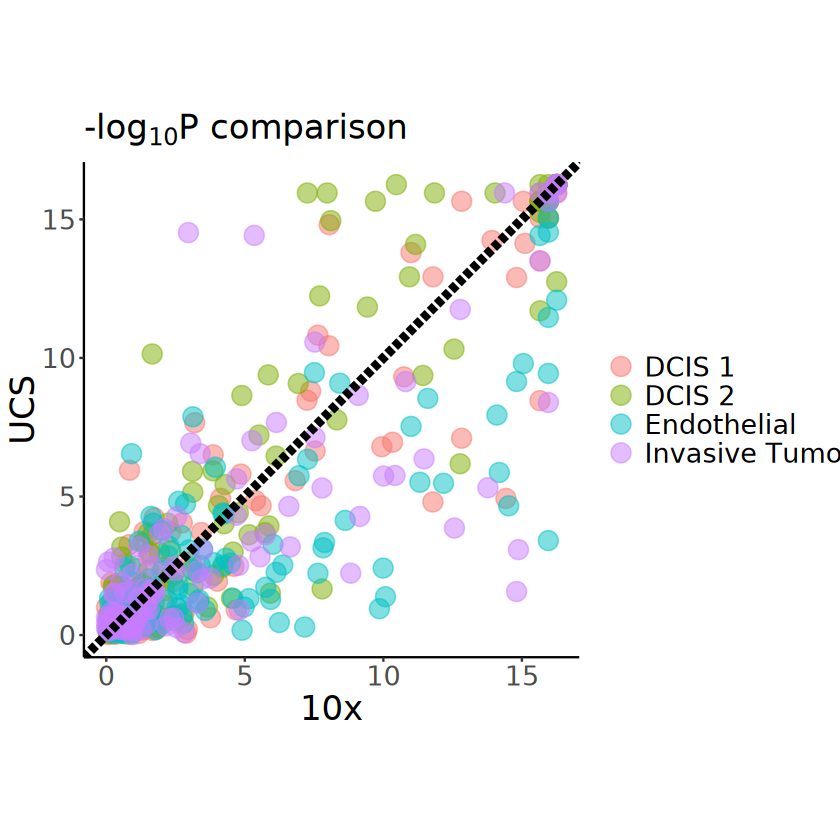

In [10]:
major_celltype <- c("DCIS 1", "DCIS 2", "Endothelial", "Invasive Tumor")
p <- ggplot(
    pvalues_all[pvalues_all$celltype %in% major_celltype, ],
    aes(x = -log10(pvalue_10x), y = -log10(pvalue_UCS))
) +
    geom_point(aes(color = celltype), size = 5, alpha = 0.5) +
    geom_abline(
        intercept = 0, slope = 1,
        linetype = "longdash", linewidth = 2
    ) +        
    coord_fixed(ratio = 1) +
    theme_classic() +
    labs(
        x = "10x", y = "UCS",
        title = expression(paste("-log"[10], plain(P), " comparison"))
    ) +
    theme(
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
ggsave(
    filename = file.path(RESULT_PATH, "SPARK_seg_comparison_together.pdf"),
    plot = p, width = 8, height = 8
)
p